In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dia=pd.read_csv('Diamonds Prices2022 2.csv')

In [3]:
dia.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [158]:
dia.nunique()

Unnamed: 0    53943
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [4]:
data_encoded=pd.get_dummies(dia, columns=['cut','color','clarity'])

In [150]:
data_encoded

Unnamed: 0  carat  depth  table  price     x     y     z  cut_Fair  \
0               1   0.23   61.5   55.0    326  3.95  3.98  2.43         0   
1               2   0.21   59.8   61.0    326  3.89  3.84  2.31         0   
2               3   0.23   56.9   65.0    327  4.05  4.07  2.31         0   
3               4   0.29   62.4   58.0    334  4.20  4.23  2.63         0   
4               5   0.31   63.3   58.0    335  4.34  4.35  2.75         0   
...           ...    ...    ...    ...    ...   ...   ...   ...       ...   
53938       53939   0.86   61.0   58.0   2757  6.15  6.12  3.74         0   
53939       53940   0.75   62.2   55.0   2757  5.83  5.87  3.64         0   
53940       53941   0.71   60.5   55.0   2756  5.79  5.74  3.49         0   
53941       53942   0.71   59.8   62.0   2756  5.74  5.73  3.43         0   
53942       53943   0.70   60.5   59.0   2757  5.71  5.76  3.47         0   

       cut_Good  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0             0  ...        0        0           0           0            0   
1             0  ...        0        0           0           0            1   
2             1  ...        0        0           0           0            0   
3             0  ...        1        0           0           0            0   
4             1  ...        0        1           0           0            0   
...         ...  ...      ...      ...         ...         ...          ...   
53938         0  ...        0        0           0           0            0   
53939         0  ...        0        0           0           0            0   
53940         0  ...        0        0           0           0            1   
53941         0  ...        0        0           0           0            1   
53942         0  ...        0        0           0           0            0   

       clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0                1            0            0             0             0  
1                0            0            0             0             0  
2                0            1            0             0             0  
3                0            0            1             0             0  
4                1            0            0             0             0  
...            ...          ...          ...           ...           ...  
53938            1            0            0             0             0  
53939            1            0            0             0             0  
53940            0            0            0             0             0  
53941            0            0            0             0             0  
53942            0            0            1             0             0  

[53943 rows x 28 columns]

In [5]:
corr_matrix=data_encoded.corr()

In [6]:
corr_sorted=corr_matrix.unstack().sort_values(ascending=False).drop_duplicates

In [7]:
corr_sorted_positive = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
corr_above_05 = corr_sorted_positive[corr_sorted_positive > 0.5]

In [8]:
print(corr_above_05)

Unnamed: 0  Unnamed: 0    1.000000
x           carat         0.975093
y           x             0.974701
x           z             0.970771
z           carat         0.953387
y           z             0.952005
carat       y             0.951721
            price         0.921591
x           price         0.884433
price       y             0.865419
z           price         0.861249
dtype: float64


In [9]:
corr_sorted_negative = corr_matrix.unstack().sort_values().drop_duplicates()
corr_below_minus_05 = corr_sorted_negative[corr_sorted_negative < -0.5]

In [10]:
print(corr_below_minus_05)

cut_Ideal  table   -0.549584
dtype: float64


In [11]:
corr_price=data_encoded.corr()['price']
corr_price=corr_price.sort_values(ascending=False)

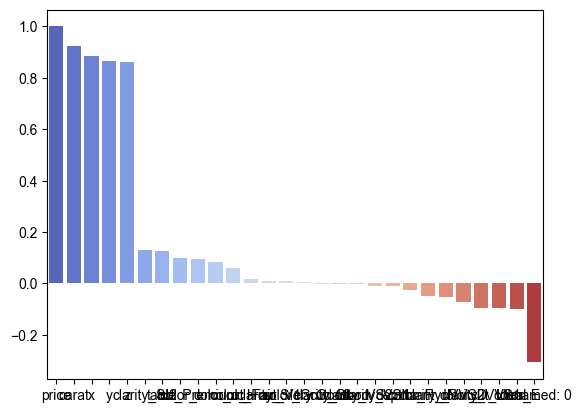

In [12]:
sns.barplot(x=corr_price.index, y=corr_price.values, palette='coolwarm')
sns.set(font_scale=0.05)
sns.set(rc={'figure.figsize':(20,8)})

<AxesSubplot:>

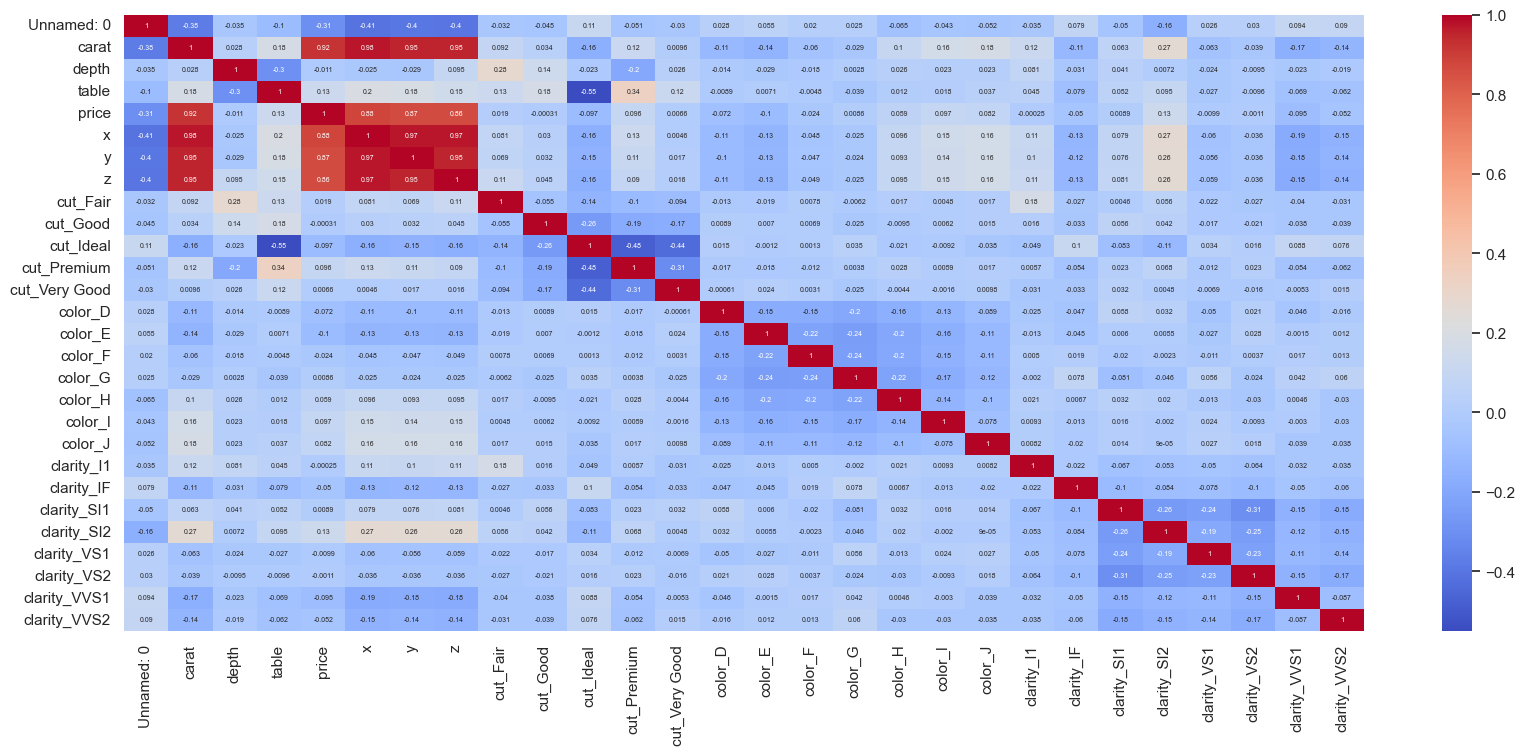

In [13]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize':5})

The larger the table size, the less likely the cut will be ideal and the more likely it will be a Premium cut

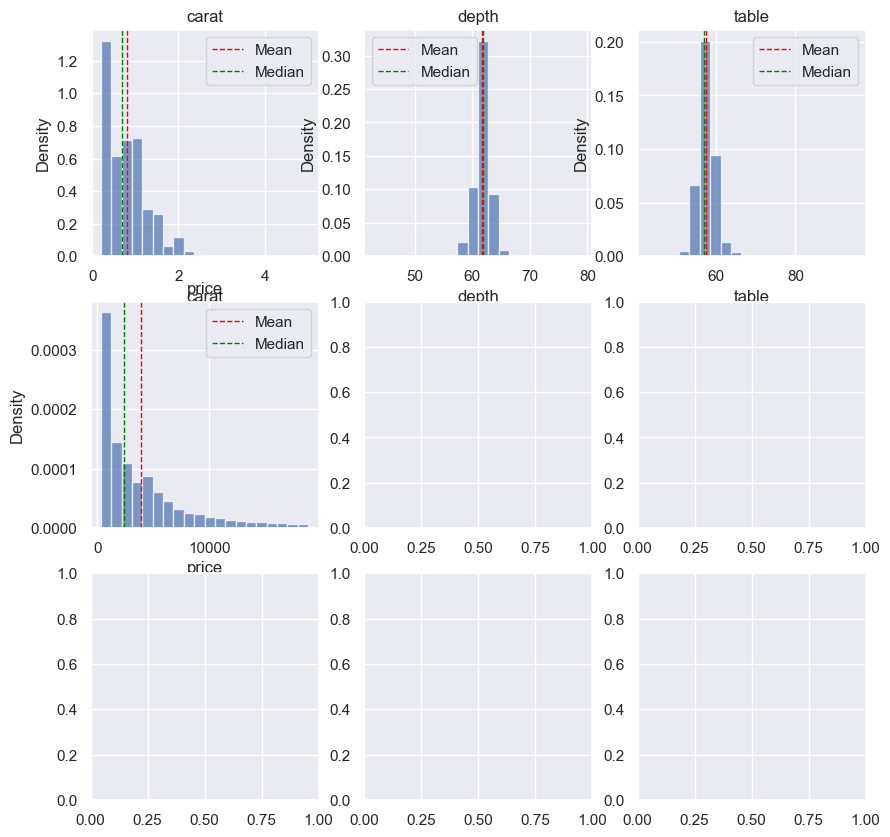

In [14]:
# Define a list of numerical variables to plot
numerical_vars = ['carat', 'depth', 'table', 'price']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs = axs.flatten()
for i, var in enumerate(numerical_vars):
    axs[i].hist(dia[var], bins=20, density=True, alpha=0.7)
    axs[i].set_title(var)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Density')
    axs[i].axvline(dia[var].mean(), color='red', linestyle='dashed', linewidth=1)
    axs[i].axvline(dia[var].median(), color='green', linestyle='dashed', linewidth=1)
    axs[i].legend({'Mean': dia[var].mean(), 'Median': dia[var].median()})

plt.show()

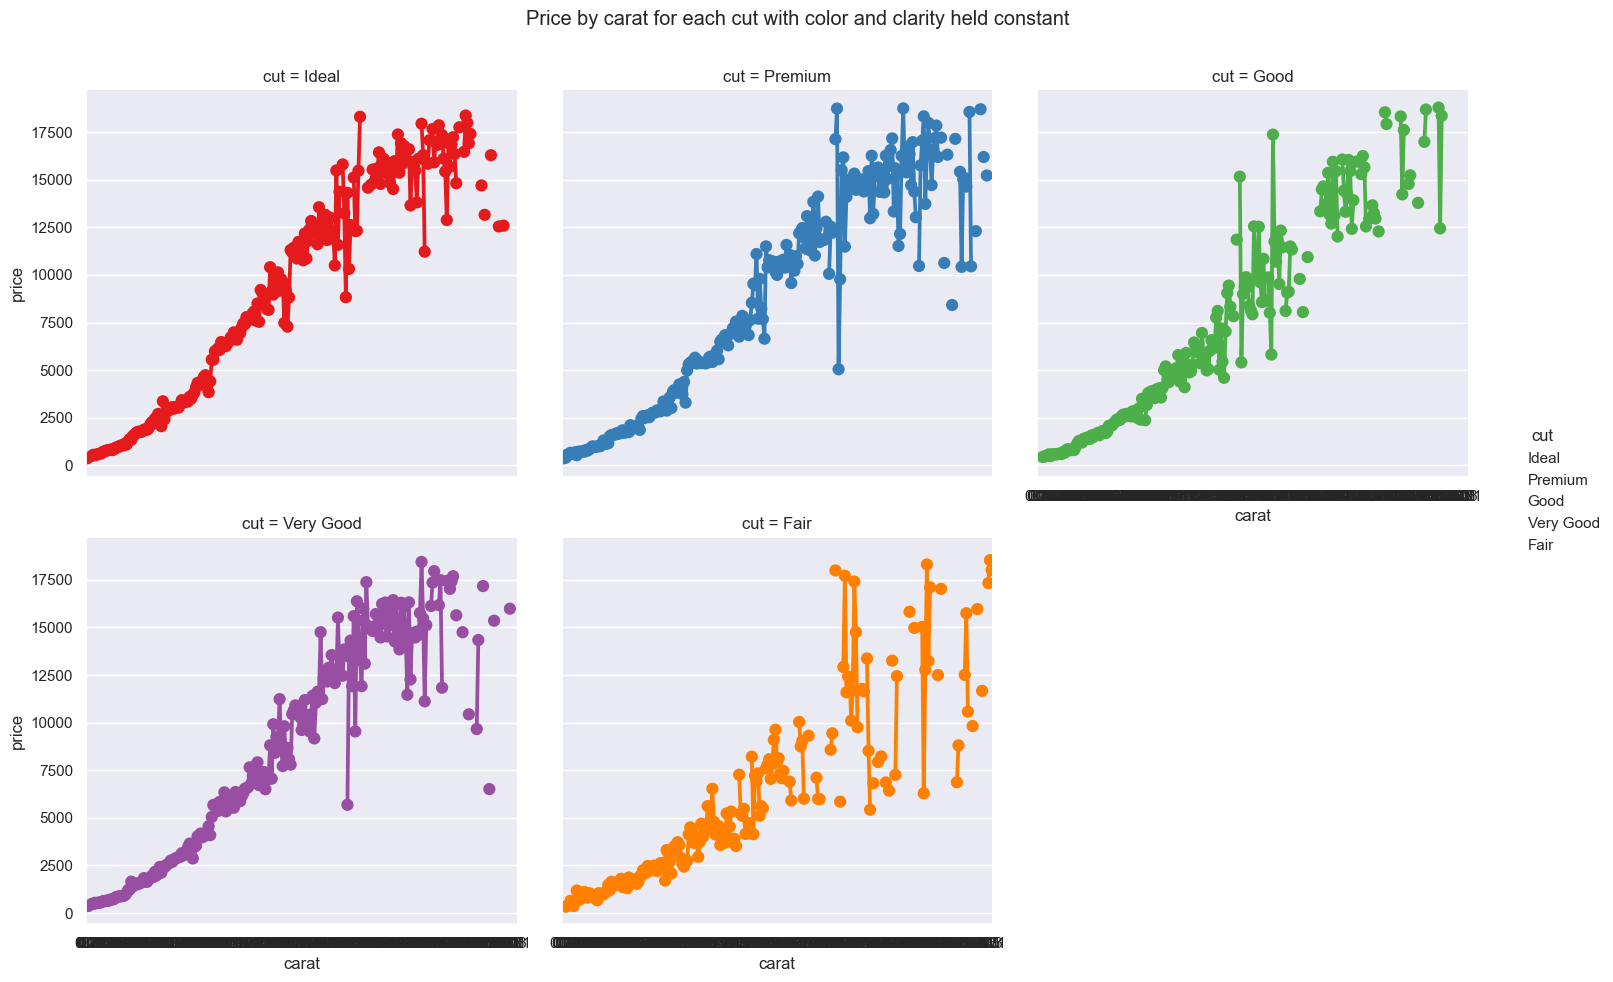

In [15]:
constant_vars = ['color', 'clarity']

# Create a FacetGrid with color and clarity held constant
g = sns.FacetGrid(dia, col='cut', hue='cut', col_wrap=3, height=5, palette='Set1', margin_titles=True)
g.map(sns.pointplot, 'carat', 'price', order=sorted(dia['carat'].unique()), ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price by carat for each cut with color and clarity held constant')
plt.show()

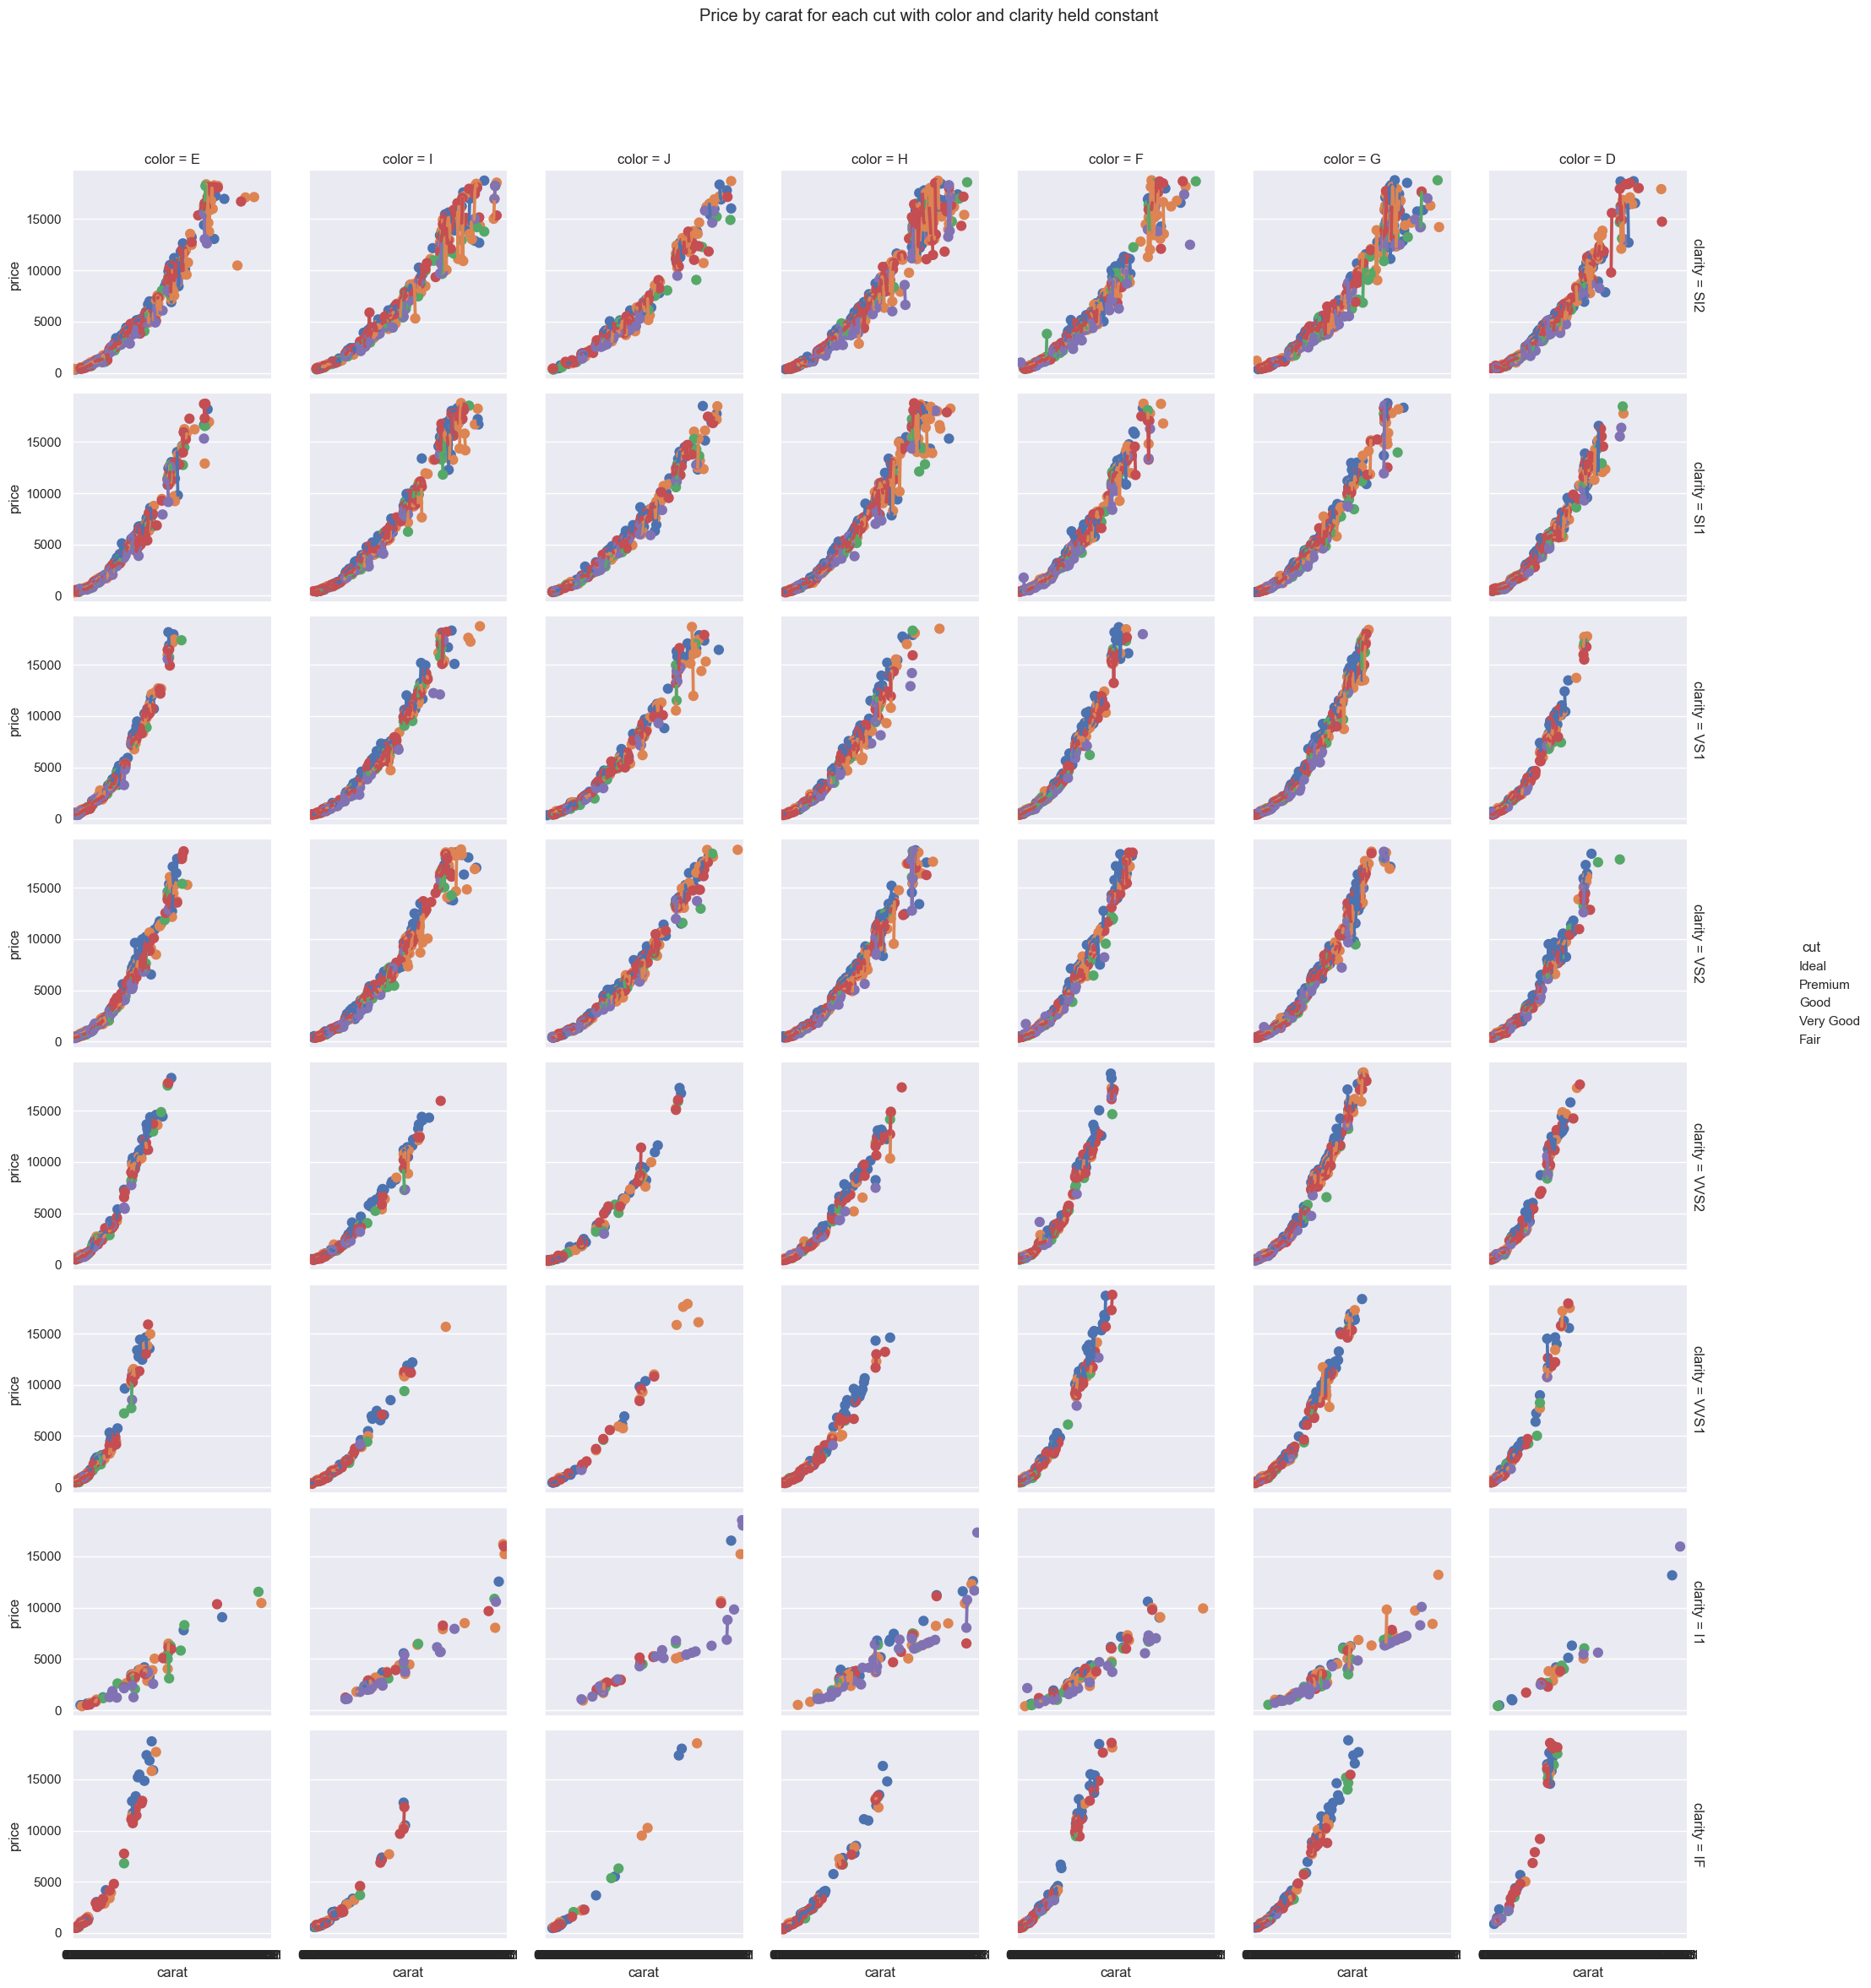

In [16]:
# Define the variables to hold constant
constant_vars = ['cut']

# Create a FacetGrid with cut held constant
g = sns.FacetGrid(dia, col='color', row='clarity', hue='cut', height=3, margin_titles=True)
g.map(sns.pointplot, 'carat', 'price', order=sorted(dia['carat'].unique()), ci=None)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price by carat for each cut with color and clarity held constant')
plt.show()


In [17]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

fig=px.scatter_3d(dia, x='carat', y='price', z='clarity', symbol='color',
                  opacity=0.7, size='carat', size_max=10, hover_data=['carat','cut','color','clarity'])
fig.update_layout(title='Price by carat, cut, color, and clarity', scene=dict(xaxis_title='Carat', yaxis_title='Cut', zaxis_title='Price'))

# Show the plot
fig.show()

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

cols = ['carat', 'cut', 'color', 'clarity']

X= dia[cols]

# Create a new Series with the target variable (price)
y = dia['price']

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit and transform the categorical variables
X_encoded = encoder.fit_transform(X[['cut', 'color', 'clarity']])

# Merge the one-hot encoded variables with the continuous variables
X_final = pd.concat([X[['carat']], pd.DataFrame(X_encoded.toarray())], axis=1)

# Create a new instance of the LinearRegression class
model = LinearRegression()

# Fit the model using the X_final and y data
reg=model.fit(X_final, y)

# Print the coefficients for each feature
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 3127392478463738.0
Coefficients: [ 8.90341283e+03 -3.62486360e+14 -3.62486360e+14 -3.62486360e+14
 -3.62486360e+14 -3.62486360e+14 -3.84223542e+14 -3.84223542e+14
 -3.84223542e+14 -3.84223542e+14 -3.84223542e+14 -3.84223542e+14
 -3.84223542e+14 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15
 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15 -2.38068258e+15
 -2.38068258e+15]


/Users/sagarsaccount/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [31]:
dia.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [44]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv('Diamonds Prices2022 2.csv')

# One-hot-encode the categorical variables
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

# Fit the OLS model
model = smf.ols(formula='price ~ carat + depth + table + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.810e+04
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        09:19:30   Log-Likelihood:            -4.5575e+05
No. Observations:               53943   AIC:                         9.116e+05
Df Residuals:                   53920   BIC:                         9.118e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5159.6424    294.909     17.496

<AxesSubplot:>

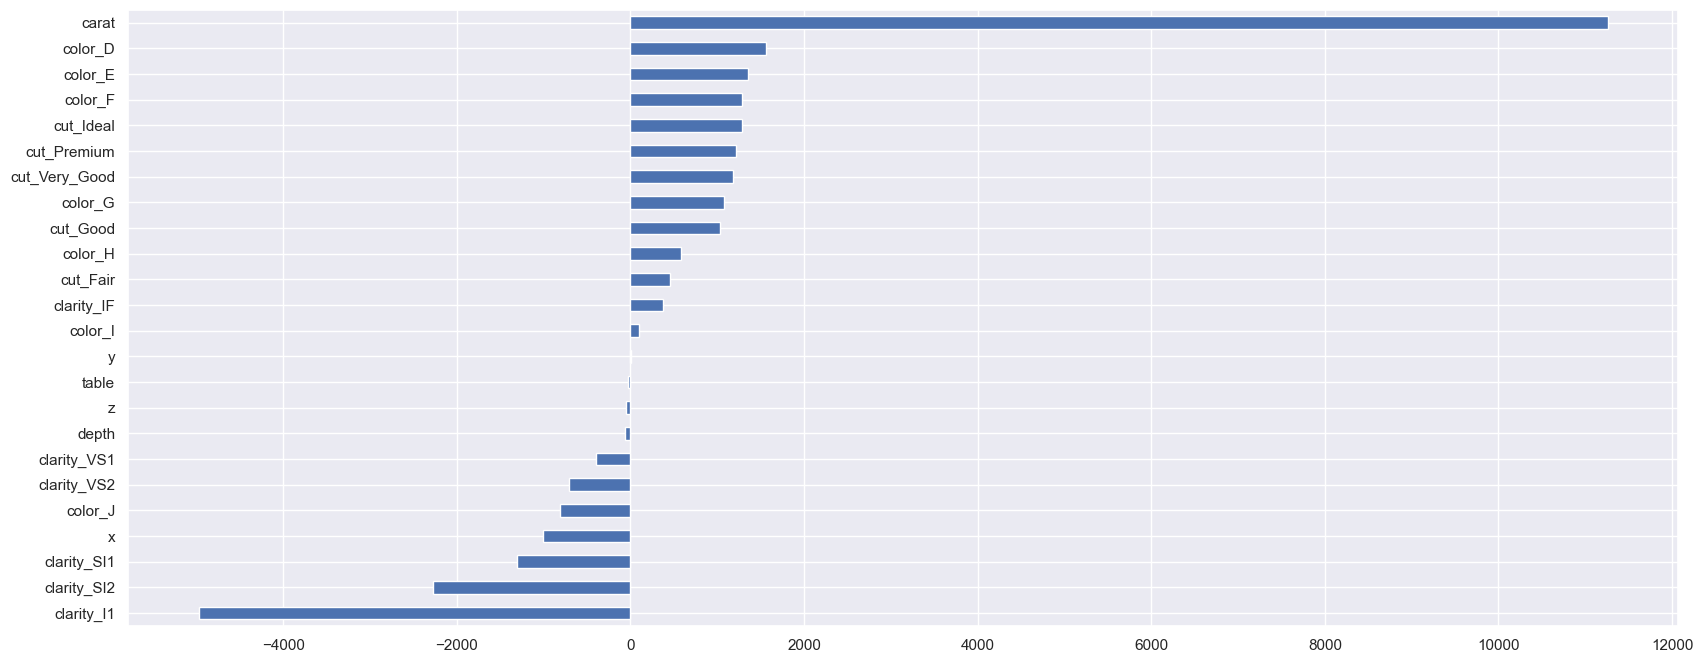

## What can we tell from the data above?
#### - The coefficient of each independent variable is the amount by which the target variable is expected to change when that independent variable increases by one unit, while holding all other independent variables constant.
#### - We can see that **carat** is easily the most influential variable on price
#### - We can also see that unless the **clarity** is not IF, it has a **negative** effect on price. 
#### - Having a clarity of *SI1, SI2, or I1* has a large **depreciating factor** regardless of the cut or color.
#### - When a diamond is described to have the **color J**, it is most often depreciated in value to some extent


## Variables That Increase the Price (Order of Importance Based on Data):
1. #### Carat
2. #### Color
3. #### Cut
4. #### Clarity (Significantly decreases price if not IF)

In [117]:
df=model.params
dia_df=pd.DataFrame(df, columns=['coefficient'])
dia_df.head(2)

coefficient
Intercept   5159.642423
carat      11259.972490

In [121]:
df=dict(zip(df,range(len(df))))
dia_df2=pd.DataFrame(df,columns=['coefficient'])
DF_pos=dia_df[dia_df['coefficient']>0]

In [128]:
DF_pos.sort_values(by='coefficient',ascending=False)

coefficient
carat          11259.972490
Intercept       5159.642423
color_D         1561.797778
color_E         1353.130482
color_F         1289.977920
cut_Ideal       1284.880955
cut_Premium     1213.875748
cut_Very_Good   1178.202750
color_G         1080.653919
cut_Good        1031.417004
color_H          583.216411
cut_Fair         451.265965
clarity_IF       370.113416
color_I           97.330951
y                  9.546734

In [129]:
DF_neg=dia_df[dia_df['coefficient']<0]

In [130]:
DF_neg.sort_values(by='coefficient', ascending=True)

coefficient
clarity_I1  -4973.589981
clarity_SI2 -2271.092909
clarity_SI1 -1308.555826
x           -1010.153768
color_J      -806.465039
clarity_VS2  -707.028663
clarity_VS1  -395.946250
depth         -63.914435
z             -50.032655
table         -26.478907

In [32]:


model1 = smf.ols('price ~ carat + depth + table', data=dia).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        09:00:15   Log-Likelihood:            -4.7197e+05
No. Observations:               53943   AIC:                         9.439e+05
Df Residuals:                   53939   BIC:                         9.440e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+04    390.899     33.261      0.0

In [131]:
predicted_price = model1.predict(dia[['price','carat','table','depth']])
residuals = predicted_price - dia.price

# RMSE
rmse = (residuals**2).mean()**0.5
rmse



1526.0021575448961

Text(0.5, 1.0, 'residuals density plot')

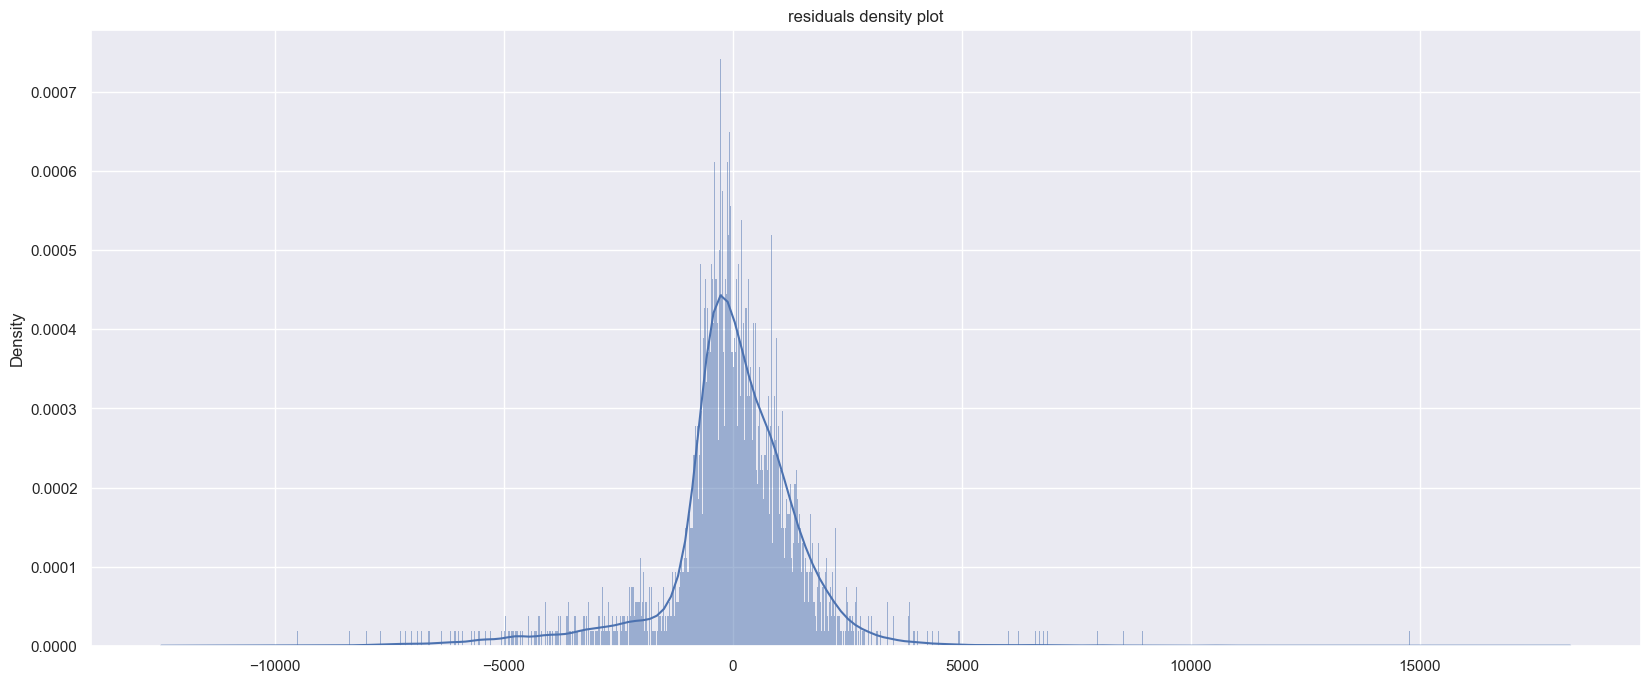

In [132]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

Text(0.5, 1.0, 'distribution of predicted and actual values')

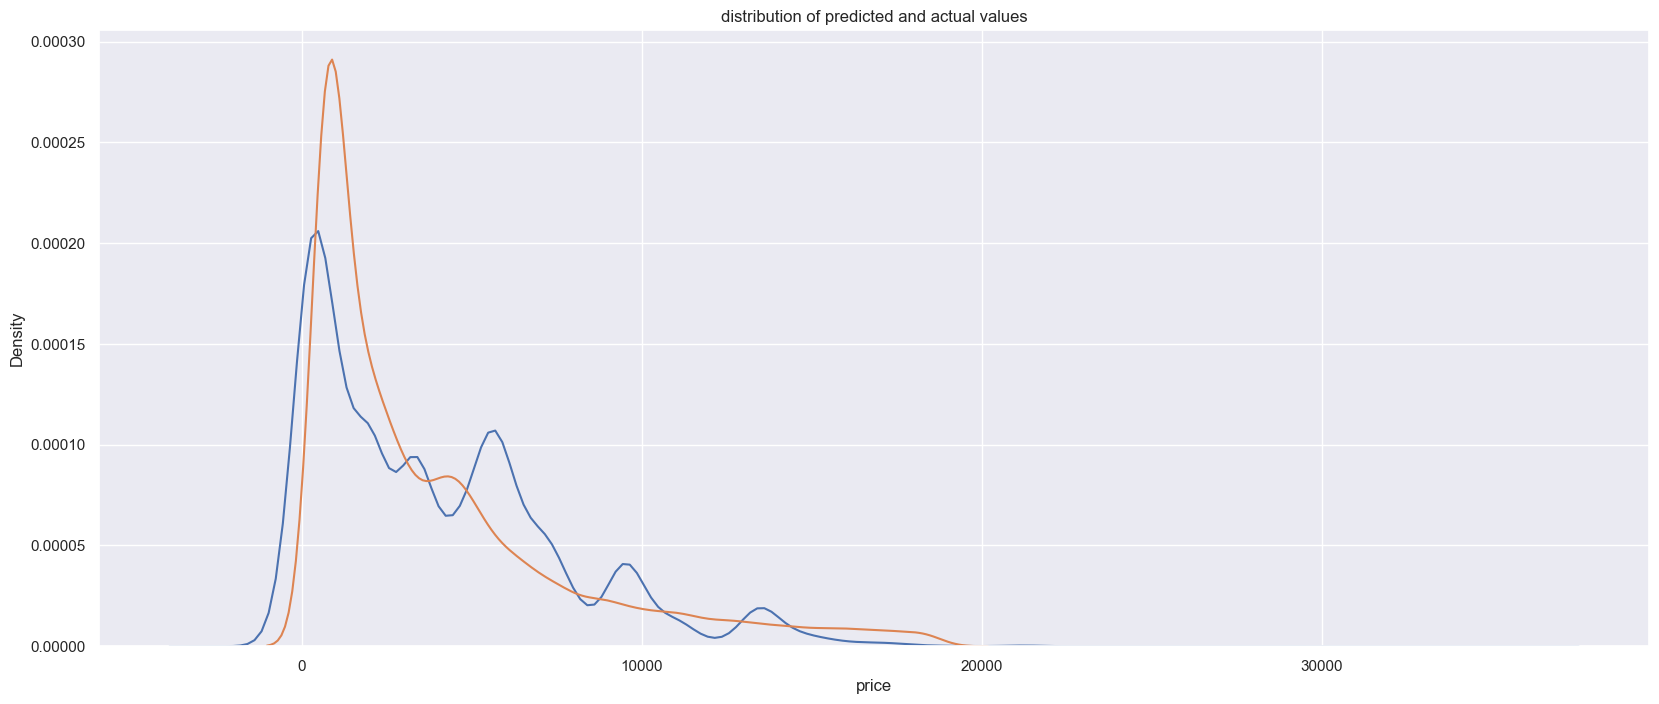

In [38]:
# Distrubution of Review Score vs Predicted Review Score

sns.kdeplot(predicted_price, label='predicted review score')
sns.kdeplot(dia.price, label = 'actual review score')
plt.title('distribution of predicted and actual values')

/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_36608/900694239.py:13: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



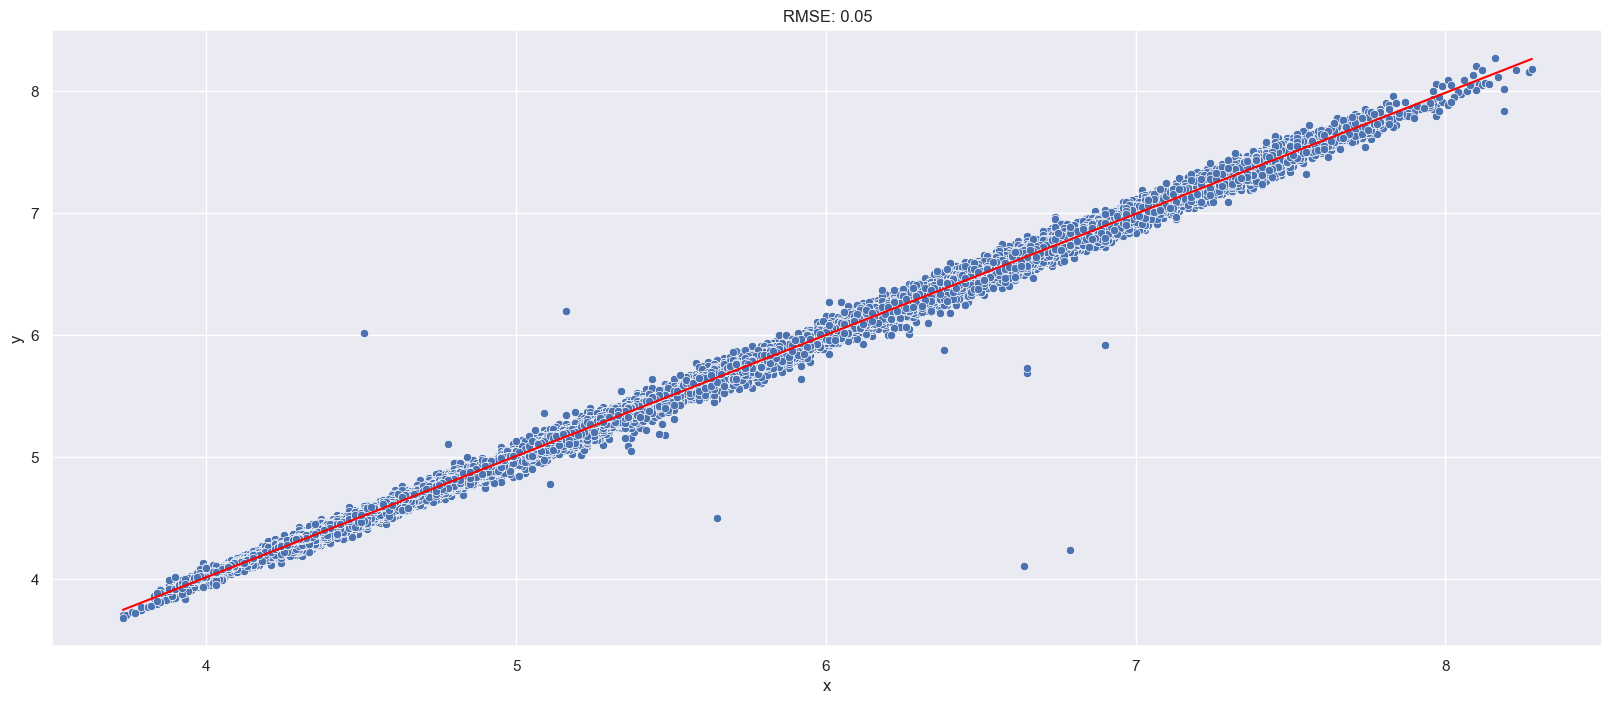

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calculate IQR
Q1 = dia.quantile(0.25)
Q3 = dia.quantile(0.75)
IQR = Q3 - Q1

# Filter data within IQR range
df = dia[~((dia < (Q1 - 1.5 * IQR)) |(dia > (Q3 + 1.5 * IQR))).any(axis=1)]

# Perform OLS regression
X = sm.add_constant(df['x'])
y = df['y']
modelo = sm.OLS(y, X).fit()

# Calculate RMSE score
y_pred = modelo.predict(X)
rmse = np.sqrt(((y_pred - y) ** 2).mean())

# Plot data and regression line
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y', ax=ax)
sns.lineplot(x=df['x'], y=y_pred, color='red', ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'RMSE: {rmse:.2f}')
plt.show()

In [146]:
rmse

0.05271230624109155

In [148]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.618e+07
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        15:56:19   Log-Likelihood:                 72430.
No. Observations:               47527   AIC:                        -1.449e+05
Df Residuals:                   47525   BIC:                        -1.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0464      0.001     33.376      0.0